# Correlation between Spectral Type and Variability
Since the spectral type cannot be easily interpreted by computers, we need to manually assign each spectral type a score (namely the spectral score)so that we can visualize how other properties change with spectral types.

## Import the packages 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

## Define Functions

In [37]:
# this function returns pandas dataframe from the TESS spread sheet
def read_tess(sheetName):
    TESS = pd.ExcelFile('TESSRechecks_ALLDATA.xlsx')
    sheet = pd.read_excel(TESS, sheetName)
    sheet = sheet[['WISEID',
                   'SPT',
                   'W1-W4',
                   'Amplitude mmags',
                   'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV']]
    sheet = sheet.rename(columns={'W1-W4': 'Excess',
                                  'Amplitude mmags': 'Amplitude',
                                  'Overall assessment: PV, QPV, IV, LAQV, LAIV, NV': 'Assessment'})
    return sheet

In [38]:
# this function returns the spectral score for every target in the data frame
def spec_score(df):
    # the score map below casts the spectral type of a target into an integer
    # the earlier the spectral type, the smaller the spectral score, starting from zero
    score_map = dict({'O': 0, 'B': 1, 'A': 2, 'F': 3, 'G': 4, 'K': 5, 'M': 6})
    # initialize a score array with length equal to the data frame
    score = np.empty(len(df))
    
    df = df.reset_index()  # make sure indexes pair with number of rows

    # traverse all rows in the data frame
    for index, row in df.iterrows():
        base = score_map[row['SPT'][0]]  # calculate the base score based on spectral type
        bonus = 0.1 * int(row['SPT'][1])  # calculate the bonus based on the sub-type
        score[index] = base + bonus
        
    df['Score'] = score
    return df

In [39]:
# this function returns parameters of the best-fit line
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X)

    numer = sum([xi*yi for xi, yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    return a, b

## Data Analysis for YSO

In [33]:
YSO = read_tess('YSOE+YSOM').dropna()
YSO = YSO[(YSO.Assessment != 'NV') & (YSO.Assessment != 'LAIV')]
YSO = spec_score(YSO)

Spearmans Correlation Coefficient for YSO: 0.23.


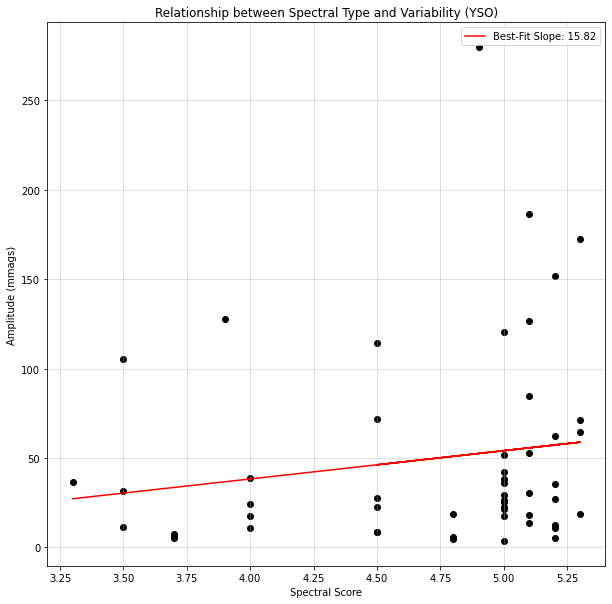

In [42]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
# set spectral score to be x-axis and variability to be y-axis
x = YSO.Score
y = YSO.Amplitude
# generate the scatter plot
ax.scatter(x, y, color='black')

# draw the best-fit line on the figures
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

# calculate the correlation coefficient with Spearman's Rank method
coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient for YSO: {coef:.2f}.")
ax.set(xlabel='Spectral Score', ylabel='Amplitude (mmags)',
       title="Relationship between Spectral Type and Variability (YSO)")
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('YSOSpecVar.png')
plt.show()

Spearmans Correlation Coefficient for YSO: -0.12.


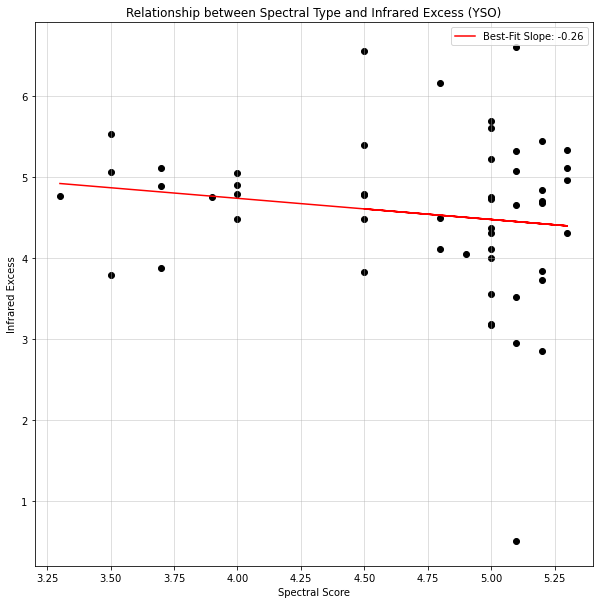

In [43]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
# set spectral score to be x-axis and variability to be y-axis
x = YSO.Score
y = YSO.Excess
# generate the scatter plot
ax.scatter(x, y, color='black')

# draw the best-fit line on the figures
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

# calculate the correlation coefficient with Spearman's Rank method
coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient for YSO: {coef:.2f}.")
ax.set(xlabel='Spectral Score', ylabel='Infrared Excess',
       title="Relationship between Spectral Type and Infrared Excess (YSO)")
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('YSOSpecExc.png')
plt.show()

## Data Analysis for HerbigAeBe+CBe

In [45]:
Herbig = read_tess('HerbigAeBe+CBe').dropna()
Herbig = Herbig[(Herbig.Assessment != 'NV') & (Herbig.Assessment != 'LAIV')]
Herbig = spec_score(Herbig)

Spearmans Correlation Coefficient for HerbigAeBe+CBe: 0.22.


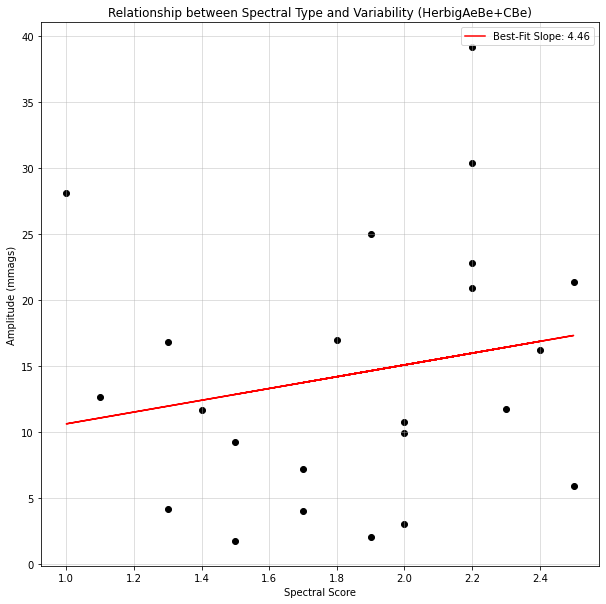

In [46]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
# set spectral score to be x-axis and variability to be y-axis
x = Herbig.Score
y = Herbig.Amplitude
# generate the scatter plot
ax.scatter(x, y, color='black')

# draw the best-fit line on the figures
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

# calculate the correlation coefficient with Spearman's Rank method
coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient for HerbigAeBe+CBe: {coef:.2f}.")
ax.set(xlabel='Spectral Score', ylabel='Amplitude (mmags)',
       title="Relationship between Spectral Type and Variability (HerbigAeBe+CBe)")
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('HerbigSpecVar.png')
plt.show()

Spearmans Correlation Coefficient for HerbigAeBe+CBe: 0.30.


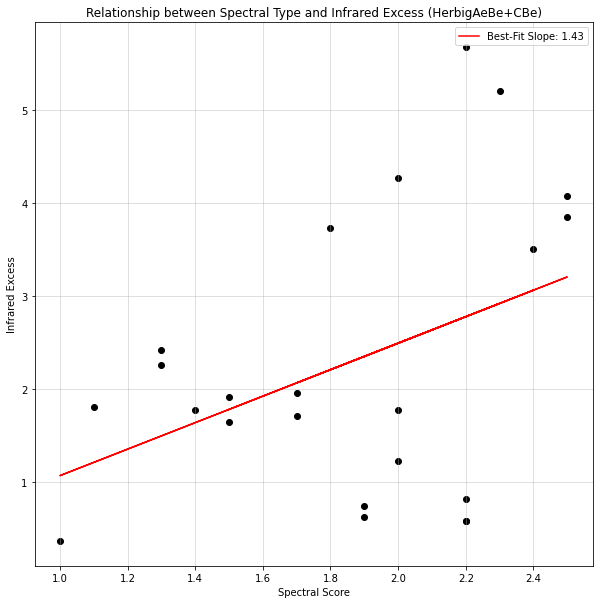

In [48]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
# set spectral score to be x-axis and variability to be y-axis
x = Herbig.Score
y = Herbig.Excess
# generate the scatter plot
ax.scatter(x, y, color='black')

# draw the best-fit line on the figures
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

# calculate the correlation coefficient with Spearman's Rank method
coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient for HerbigAeBe+CBe: {coef:.2f}.")
ax.set(xlabel='Spectral Score', ylabel='Infrared Excess',
       title="Relationship between Spectral Type and Infrared Excess (HerbigAeBe+CBe)")
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('HerbigSpecExc.png')
plt.show()

## Data Analysis for DD+EDD

In [51]:
DD = read_tess('DebrisDisk').dropna()
DD = DD[(DD.Assessment != 'NV') & (DD.Assessment != 'LAIV')]
DD = spec_score(DD)

EDD = read_tess('ExtremeDebrisDisk').dropna()
EDD = EDD[(EDD.Assessment != 'NV') & (EDD.Assessment != 'LAIV')]
EDD = spec_score(EDD)

combined = pd.concat([DD, EDD])

Spearmans Correlation Coefficient for DD+EDD: 0.02.


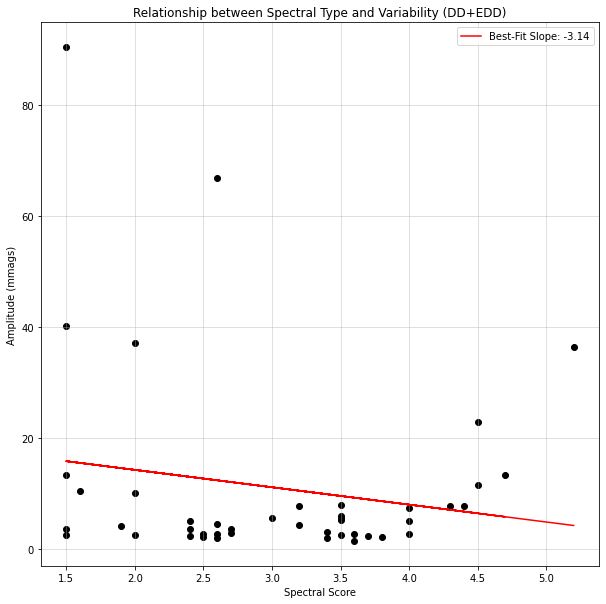

In [53]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
# set spectral score to be x-axis and variability to be y-axis
x = combined.Score
y = combined.Amplitude
# generate the scatter plot
ax.scatter(x, y, color='black')

# draw the best-fit line on the figures
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

# calculate the correlation coefficient with Spearman's Rank method
coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient for DD+EDD: {coef:.2f}.")
ax.set(xlabel='Spectral Score', ylabel='Amplitude (mmags)',
       title="Relationship between Spectral Type and Variability (DD+EDD)")
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('DDSpecVar.png')
plt.show()

Spearmans Correlation Coefficient for DD+EDD: 0.13.


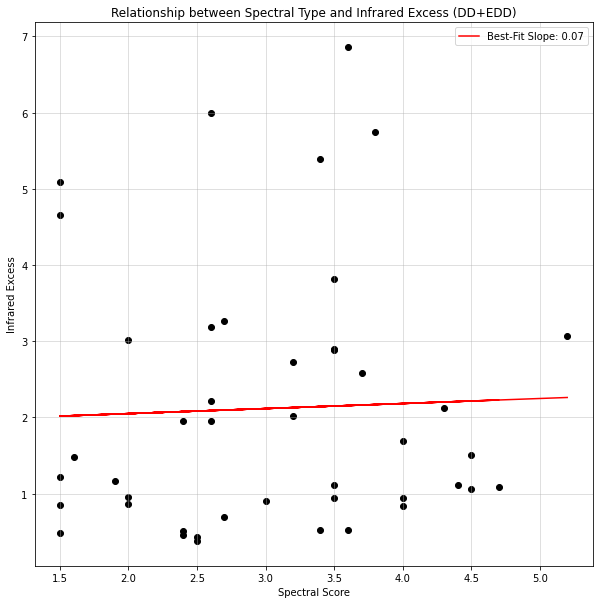

In [54]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10, 10)
# set spectral score to be x-axis and variability to be y-axis
x = combined.Score
y = combined.Excess
# generate the scatter plot
ax.scatter(x, y, color='black')

# draw the best-fit line on the figures
a, b = best_fit(x, y)
yfit = [a + b * xi for xi in x]
ax.plot(x, yfit, color='red',
        label=f"Best-Fit Slope: {b:.2f}")

# calculate the correlation coefficient with Spearman's Rank method
coef, p = spearmanr(x.astype(float), y.astype(float))
print(f"Spearmans Correlation Coefficient for DD+EDD: {coef:.2f}.")
ax.set(xlabel='Spectral Score', ylabel='Infrared Excess',
       title="Relationship between Spectral Type and Infrared Excess (DD+EDD)")
ax.grid(alpha=0.5)
ax.legend()

plt.savefig('DDSpecExc.png')
plt.show()